data preprocessing codes extracted from src/EDA/69kdataset.ipynb
+ will do eda again about our new 4 txt files

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_colwidth', None)

### 1. data pre-processing

In [2]:
data_path = 'emotion/origin/emotion-emotion_69k.csv'
df = pd.read_csv(data_path)
df = df[['Situation', 'emotion', 'empathetic_dialogues', 'labels']]
df.head()

,Situation,emotion,empathetic_dialogues,labels
0,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,"Customer :I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.\nAgent :","Was this a friend you were in love with, or just a best friend?"
1,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,Customer :This was a best friend. I miss her.\nAgent :,Where has she gone?
2,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of an argument?
3,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,"Customer :Was this a friend you were in love with, or just a best friend?\nAgent :",This was a best friend. I miss her.
4,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,Customer :Where has she gone?\nAgent :,We no longer talk.


In [3]:
df = df[['Situation', 'emotion', 'empathetic_dialogues', 'labels']]
df.head()

,Situation,emotion,empathetic_dialogues,labels
0,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,"Customer :I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.\nAgent :","Was this a friend you were in love with, or just a best friend?"
1,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,Customer :This was a best friend. I miss her.\nAgent :,Where has she gone?
2,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of an argument?
3,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,"Customer :Was this a friend you were in love with, or just a best friend?\nAgent :",This was a best friend. I miss her.
4,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,Customer :Where has she gone?\nAgent :,We no longer talk.


In [4]:
df['empathetic_dialogues'] = df['empathetic_dialogues'].str.replace(r'^Customer :|Agent :$', '', regex=True).str.strip()
df.dropna(inplace=True)
df.head(10)

,Situation,emotion,empathetic_dialogues,labels
0,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,"I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.","Was this a friend you were in love with, or just a best friend?"
1,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,This was a best friend. I miss her.,Where has she gone?
2,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,We no longer talk.,Oh was this something that happened because of an argument?
3,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,"Was this a friend you were in love with, or just a best friend?",This was a best friend. I miss her.
4,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,Where has she gone?,We no longer talk.
5,i used to scare for darkness,afraid,it feels like hitting to blank wall when i see the darkness,Oh ya? I don't really see how
6,i used to scare for darkness,afraid,dont you feel so.. its a wonder,I do actually hit blank walls a lot of times but i get by
7,i used to scare for darkness,afraid,i virtually thought so.. and i used to get sweatings,Wait what are sweatings
8,i used to scare for darkness,afraid,Oh ya? I don't really see how,dont you feel so.. its a wonder
9,i used to scare for darkness,afraid,I do actually hit blank walls a lot of times but i get by,i virtually thought so.. and i used to get sweatings


In [5]:
emotion_counts = df['emotion'].value_counts()
# Mapping emotions to their groups
emotion_mapping = {
    'surprised': 'excited',
    'joyful': 'excited',
    'terrified': 'afraid',
    'anxious': 'afraid',
    'apprehensive': 'afraid',
    'disgusted': 'disgusted',
    'embarrassed': 'disgusted',
    'guilty': 'disgusted',
    'ashamed': 'disgusted',
    'angry': 'annoyed',
    'annoyed': 'annoyed',
    'jealous': 'annoyed',
    'furious': 'annoyed',
    'faithful': 'grateful',
    'trusting': 'grateful',
    'grateful': 'grateful',
    'caring': 'grateful',
    'hopeful': 'grateful',
    'sad': 'disappointed',
    'disappointed': 'disappointed',
    'devastated': 'disappointed',
    'lonely': 'disappointed',
    'nostalgic': 'disappointed',
    'sentimental': 'disappointed',
    'proud': 'impressed',
    'impressed': 'impressed',
    'content': 'impressed',
    'anticipating': 'prepared',
    'prepared': 'prepared',
    'confident': 'prepared'
}
emotions = {}
df['grouped_emotion'] = df['emotion'].map(emotion_mapping)

In [6]:
group_counts = df['grouped_emotion'].value_counts()
print(group_counts)
print("total counts:", df['grouped_emotion'].shape[0])
df.dropna(inplace=True)

grouped_emotion
disappointed    11913
grateful         8913
annoyed          8509
disgusted        7635
impressed        6154
prepared         6000
afraid           5660
excited          5251
Name: count, dtype: int64
total counts: 64594


In [7]:
df = df[['Situation', 'grouped_emotion', 'empathetic_dialogues', 'labels']]
for column in df.columns:
    min_length_row = df[column].str.len().idxmin() 
    print(f"Column '{column}' - Shortest entry: '{df[column][min_length_row]}'")

Column 'Situation' - Shortest entry: '1'
Column 'grouped_emotion' - Shortest entry: 'afraid'
Column 'empathetic_dialogues' - Shortest entry: '3'
Column 'labels' - Shortest entry: '4'


In [8]:
columns_to_check = ['Situation','grouped_emotion', 'empathetic_dialogues', 'labels']
mask = ~df.apply(lambda x: x.str.len() < 3).any(axis=1)
df = df[mask]

for column in df.columns:
    min_length_row = df[column].str.len().idxmin() 
    print(f"Column '{column}' - Shortest entry: '{df[column][min_length_row]}'")

Column 'Situation' - Shortest entry: 'Lies'
Column 'grouped_emotion' - Shortest entry: 'afraid'
Column 'empathetic_dialogues' - Shortest entry: 'Yes'
Column 'labels' - Shortest entry: 'Yes'


In [9]:
df = df.reset_index(drop=True)
len(df)

59835

### 2. Make txt files with full (59k) data (w/o deleting repeated converstaion)

#### 1) full data (59k) & have endOfText in every 2 sentences

In [ ]:
def txt_eachconv_eot(df, file_path):
    with open(file_path, 'w', encoding='utf-8') as f:
        for _, row in df.iterrows():
            f.write(f"<bot> {row['empathetic_dialogues']}\n")
            f.write(f"<human> {row['labels']} <endOfText>\n")

# output_file = 'emotion.txt'
# save_conversation_to_file(df, output_file)

In [16]:
df.tail(20)

,Situation,grouped_emotion,empathetic_dialogues,labels
59815,My boss informed me that I am in pole position of getting the promotion.,prepared,"That's pretty awesome, congrats","Thanks, my confidence in my abilities is just getting better and better!"
59816,If there's one thing I learned it's to trust my own judgment and mine alone. Forget what the haters say and just keep grinding toward my goals,grateful,"People can give me all the bullshit advice they want on how to live my life and how I need to know my place in society....but I'll just smile and nod because I only trust my instincts and am have ridiculously more freedom, money and happiness than I've ever had before",Good on you. You need to be comfortable in your own skin and its not other people's business to tell you how to live.
59817,If there's one thing I learned it's to trust my own judgment and mine alone. Forget what the haters say and just keep grinding toward my goals,grateful,Exactly. Funny thing is they're usually the same people that bitch and moan on Facebook about having a job or boss they hate but do nothing to change their path it's hilarious,"Yes, they should really learn to concentrate on their own life instead of complaining about other people."
59818,If there's one thing I learned it's to trust my own judgment and mine alone. Forget what the haters say and just keep grinding toward my goals,grateful,Good on you. You need to be comfortable in your own skin and its not other people's business to tell you how to live.,Exactly. Funny thing is they're usually the same people that bitch and moan on Facebook about having a job or boss they hate but do nothing to change their path it's hilarious
59819,I have an overseas trip coming up. I have never been and I am feeling a little scared right now about going.,afraid,I have an overseas trip coming up. I have never been and I am feeling a little scared right now about going.,that is exciting@
59820,I have an overseas trip coming up. I have never been and I am feeling a little scared right now about going.,afraid,Yea but I have never been in a foreign country before.,yeah same but it can be fun
59821,I have an overseas trip coming up. I have never been and I am feeling a little scared right now about going.,afraid,that is exciting@,Yea but I have never been in a foreign country before.
59822,I was watching professional rodeo the other day. It is amazing how those cowboys can stay on the bulls so long. It looks so hard to do.,impressed,I was watching professional rodeo last night. I was amazed at how the cowboyos can stay on the bulls so long.,That is an amazing talent to have. I would be so scared!
59823,I was watching professional rodeo the other day. It is amazing how those cowboys can stay on the bulls so long. It looks so hard to do.,impressed,Yeah they must practice a lot. I would be afraid of getting trampled.,"Me too, that would be terrible."
59824,I was watching professional rodeo the other day. It is amazing how those cowboys can stay on the bulls so long. It looks so hard to do.,impressed,That is an amazing talent to have. I would be so scared!,Yeah they must practice a lot. I would be afraid of getting trampled.


In [17]:
txt_eachconv_eot(df, '59k_eachconv_eot.txt')

#### 2) full data (59k) & have endOfText at the very end of whole conversation within the same context

In [20]:
def txt_wholeconv_eot(df, file_path):
    with open(file_path, 'w', encoding='utf-8') as f:
        prev_emotion = None  
        for i, row in df.iterrows():
            f.write(f"<bot> {row['empathetic_dialogues']}\n")
            
            if i == len(df) - 1 or row['grouped_emotion'] != df.iloc[i + 1]['grouped_emotion']:
                f.write(f"<human> {row['labels']} <endOfText>\n")
            else:
                f.write(f"<human> {row['labels']}\n")


In [21]:
txt_wholeconv_eot(df, '59k_wholeconv_eot.txt')

### 3. Make txt files with 38k data (w deleting repeated converstaion)
+ its really weird ...!? i used same code but this time we got 38k data (not 21k) after deleting,,, hmm 

In [22]:
index_to_delete = []

for index, row in df.iterrows():
    if row['empathetic_dialogues'] in df['labels'][:index].values:
        index_to_delete.append(index)

duplicates = df.loc[index_to_delete]
duplicates_sorted = duplicates.sort_index()
duplicates

,Situation,grouped_emotion,empathetic_dialogues,labels
3,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,"Was this a friend you were in love with, or just a best friend?",This was a best friend. I miss her.
4,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,Where has she gone?,We no longer talk.
7,I showed a guy how to run a good bead in welding class and he caught on quick.,impressed,doing good.. how about you,"Im good, trying to understand how someone can feel like hitting a blank wall when they see the darkness"
8,I showed a guy how to run a good bead in welding class and he caught on quick.,impressed,it's quite strange that you didnt imagine it,"i dont imagine feeling a lot, maybe your on to something"
14,A recent job interview that I had made me feel very anxious because I felt like I didn't come prepared.,afraid,Don't be nervous. Just be prepared.,I feel like getting prepared and then having a curve ball thrown at you throws you off.
...,...,...,...,...
59821,I have an overseas trip coming up. I have never been and I am feeling a little scared right now about going.,afraid,that is exciting@,Yea but I have never been in a foreign country before.
59824,I was watching professional rodeo the other day. It is amazing how those cowboys can stay on the bulls so long. It looks so hard to do.,impressed,That is an amazing talent to have. I would be so scared!,Yeah they must practice a lot. I would be afraid of getting trampled.
59827,I am waiting to see if I pass my graduate exam and I am feeling this way.,prepared,I hope you did it. Don't worry too much.,"Thank you, I am trying my best."
59830,I found some pictures of my grandma in the attic last night,disappointed,Did you find anything great?,Yeah I found some old pictures of when us kids used to go to my grandma's house for xmas


In [23]:
final_df = df[~df.isin(duplicates).all(axis=1)].reset_index(drop=True)
final_df

,Situation,grouped_emotion,empathetic_dialogues,labels
0,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,"I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.","Was this a friend you were in love with, or just a best friend?"
1,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,This was a best friend. I miss her.,Where has she gone?
2,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,We no longer talk.,Oh was this something that happened because of an argument?
3,I showed a guy how to run a good bead in welding class and he caught on quick.,impressed,Hi how are you doing today,doing good.. how about you
4,I showed a guy how to run a good bead in welding class and he caught on quick.,impressed,"Im good, trying to understand how someone can feel like hitting a blank wall when they see the darkness",it's quite strange that you didnt imagine it
...,...,...,...,...
38749,I found some pictures of my grandma in the attic last night,disappointed,I was going through the stuff in my attic last night,Did you find anything great?
38750,I found some pictures of my grandma in the attic last night,disappointed,Yeah I found some old pictures of when us kids used to go to my grandma's house for xmas,What a wonderful memory.
38751,I found some pictures of my grandma in the attic last night,disappointed,What a wonderful memory.,Yeah reminds me of the good old days. I miss my grandma. She passed away about 15 years ago.
38752,I woke up this morning to my wife telling me she was pregnant!,excited,I woke up this morning to my wife telling me she's pregnant!,Oh hey that's awesome! That is awesome right?


In [24]:
txt_eachconv_eot(final_df, '38k_eachconv_eot.txt')
txt_wholeconv_eot(final_df, '38k_wholeconv_eot.txt')

### 4. EDA with our undeleted data

In [41]:
df.head()

,Situation,grouped_emotion,empathetic_dialogues,labels
0,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,"I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.","Was this a friend you were in love with, or just a best friend?"
1,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,This was a best friend. I miss her.,Where has she gone?
2,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,We no longer talk.,Oh was this something that happened because of an argument?
3,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,"Was this a friend you were in love with, or just a best friend?",This was a best friend. I miss her.
4,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,Where has she gone?,We no longer talk.


1. User Input

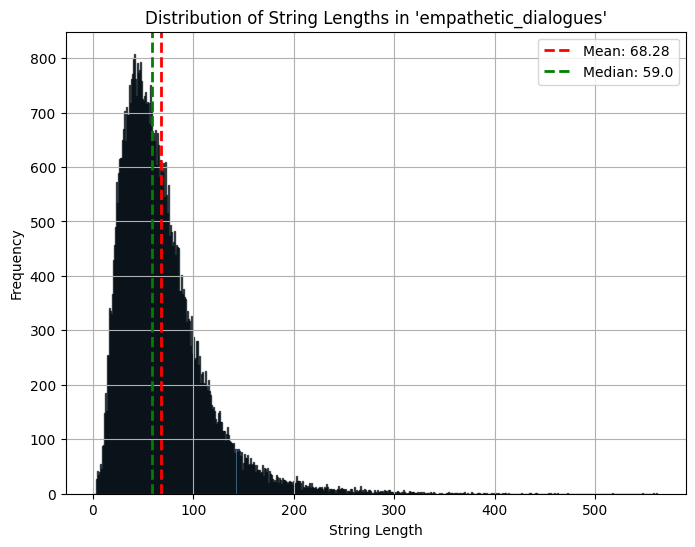

In [42]:
df['len_ed'] = df['empathetic_dialogues'].str.len()

mean_length = df['len_ed'].mean()
median_length = df['len_ed'].median()

plt.figure(figsize=(8, 6))
plt.hist(df['len_ed'], bins=range(1, df['len_ed'].max() + 2), edgecolor='black', alpha=0.7)

plt.axvline(mean_length, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_length}')

plt.title("Distribution of String Lengths in 'empathetic_dialogues'")
plt.xlabel("String Length")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

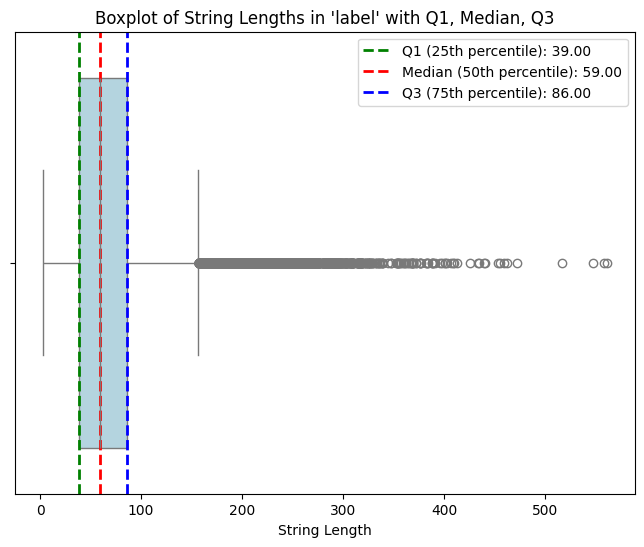

In [43]:
Q1 = df['len_ed'].quantile(0.25)
Q2 = df['len_ed'].quantile(0.50) 
Q3 = df['len_ed'].quantile(0.75)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['len_ed'], color='lightblue')

plt.axvline(Q1, color='g', linestyle='dashed', linewidth=2, label=f'Q1 (25th percentile): {Q1:.2f}')
plt.axvline(Q2, color='r', linestyle='dashed', linewidth=2, label=f'Median (50th percentile): {Q2:.2f}')
plt.axvline(Q3, color='b', linestyle='dashed', linewidth=2, label=f'Q3 (75th percentile): {Q3:.2f}')

plt.title("Boxplot of String Lengths in 'label' with Q1, Median, Q3")
plt.xlabel("String Length")

plt.legend()
plt.show()

In [44]:
# Example sentences that are close to the average length
mean_length = 68 
close_to_mean = df[df['len_ed'] == mean_length]

print(close_to_mean['empathetic_dialogues'].head())

33     Got rejected from a place I wanted to work, not once but three times
126    I just really wanted some ice cream! Now I know their hours, though.
139    I do sales work, but he always lies to us and takes our bonus money.
199    Yeah, thank you! at which situation did you feel hope for your life?
311    I hear ya.. I hope you find one soon... wishing you all of the best!
Name: empathetic_dialogues, dtype: object


2. Output

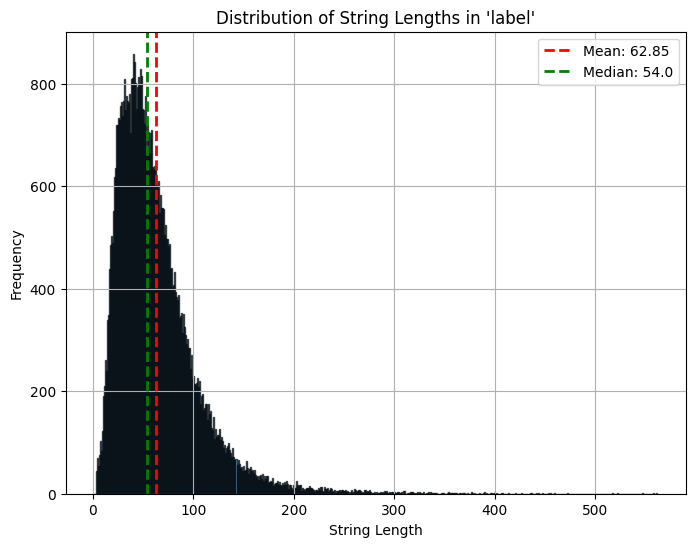

In [45]:
df['len_labels'] = df['labels'].str.len()

mean_length = df['len_labels'].mean()
median_length = df['len_labels'].median()

plt.figure(figsize=(8, 6))
plt.hist(df['len_labels'], bins=range(1, df['len_labels'].max() + 2), edgecolor='black', alpha=0.7)

plt.axvline(mean_length, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_length}')

plt.title("Distribution of String Lengths in 'label'")
plt.xlabel("String Length")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

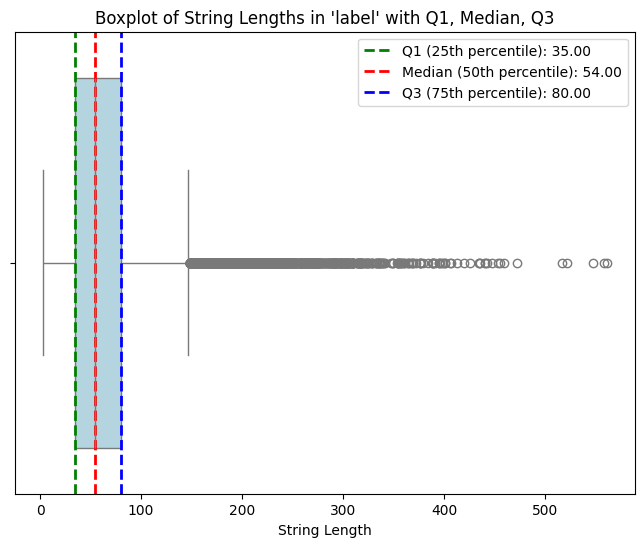

In [46]:
Q1 = df['len_labels'].quantile(0.25)
Q2 = df['len_labels'].quantile(0.50) 
Q3 = df['len_labels'].quantile(0.75)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['len_labels'], color='lightblue')

plt.axvline(Q1, color='g', linestyle='dashed', linewidth=2, label=f'Q1 (25th percentile): {Q1:.2f}')
plt.axvline(Q2, color='r', linestyle='dashed', linewidth=2, label=f'Median (50th percentile): {Q2:.2f}')
plt.axvline(Q3, color='b', linestyle='dashed', linewidth=2, label=f'Q3 (75th percentile): {Q3:.2f}')

plt.title("Boxplot of String Lengths in 'label' with Q1, Median, Q3")
plt.xlabel("String Length")

plt.legend()
plt.show()

In [53]:
# Example sentences that are close to the average length
mean_length = 63
close_to_mean = df[df['len_labels'] == mean_length]

print(close_to_mean['labels'].head())

0      Was this a friend you were in love with, or just a best friend?
179    The grass makes me itchy, But the shower afterward feels great.
196    I still took it since it was late but I rode in the front seat.
338    Oh no... were they relaxed about it or did it cause a problem? 
459    That's really considerate of you. Do they need your help a lot?
Name: labels, dtype: object


3. Analysis

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(df['empathetic_dialogues'])

vocab_size = len(vectorizer.vocabulary_)
print(f"Vocab size: {vocab_size}")

vectorizer = CountVectorizer()
vectorizer.fit(df['labels'])

vocab_size = len(vectorizer.vocabulary_)
print(f"Vocab size: {vocab_size}")

Vocab size: 16442
Vocab size: 15860


In [10]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

/opt/anaconda3/envs/ml_syj/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


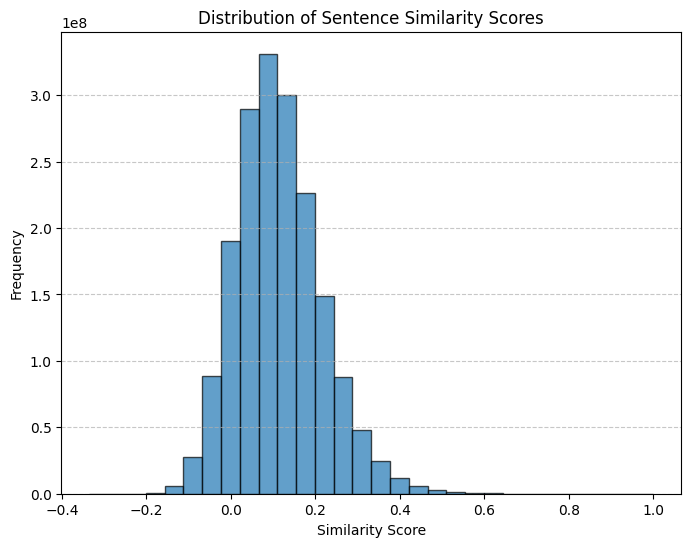

: 

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
label_embeddings = model.encode(df['empathetic_dialogues'].tolist())
cosine_sim_matrix = cosine_similarity(label_embeddings)
similarity_df = pd.DataFrame(cosine_sim_matrix, columns=df['empathetic_dialogues'], index=df['empathetic_dialogues'])

similarity_values = similarity_df.values
upper_triangle_indices = np.triu_indices_from(similarity_values, k=1)  
similarity_scores = similarity_values[upper_triangle_indices]

plt.figure(figsize=(8, 6))
plt.hist(similarity_scores, bins=30, alpha=0.7, edgecolor='black')
plt.title("Distribution of Sentence Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

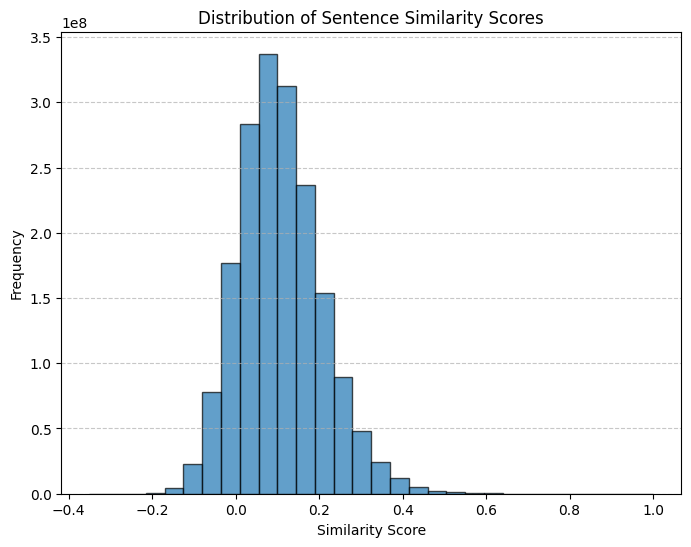

In [11]:
model = SentenceTransformer('all-MiniLM-L6-v2')
label_embeddings = model.encode(df['labels'].tolist())
cosine_sim_matrix = cosine_similarity(label_embeddings)
similarity_df = pd.DataFrame(cosine_sim_matrix, columns=df['labels'], index=df['labels'])

similarity_values = similarity_df.values
upper_triangle_indices = np.triu_indices_from(similarity_values, k=1)  
similarity_scores = similarity_values[upper_triangle_indices]

plt.figure(figsize=(8, 6))
plt.hist(similarity_scores, bins=30, alpha=0.7, edgecolor='black')
plt.title("Distribution of Sentence Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Cosine Similarity**
1. Range and meaning of values
+ 1 (perfectly equal):
  + When two vectors have the same direction.
  + Example: When the meaning or structure of text is nearly identical.
+ 0 (completely independent):
  + When two vectors are orthogonal to each other.
  + Example: When the texts cover completely different topics.
+ -1 (completely opposite):
  + When two vectors are in completely opposite directions.
  + Rarely encountered in textual data, more likely to occur in vectorised data.

2. Interpretation
+ The highest frequency of similarity scores clustered around 0.0
  + most sentence pairs have little to no similarity.
  + They are likely discussing unrelated topics or have very different content.
+ Skew Towards Lower Values
  + Dataset contains diverse and largely unrelated sentence pairs.
